#Support Vector Machines

In [104]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import mglearn
import numpy as np
import pandas as pd

from sklearn.preprocessing import  StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [127]:
def load_data(data_path='ex4data1.mat'):
    data = loadmat(data_path)
    X = data["X"]
    y = data["y"].ravel()
    return X,y

from sklearn.svm import LinearSVC
def linear_svm(X,y,C=1.0):
    svc=LinearSVC(C=C)
    model=svc.fit(X,y)
    print(f'accuracy={model.score(X,y)}')
    mglearn.plots.plot_2d_separator(model, X, eps=.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

from sklearn.svm import SVC
def SVM(X,y,C=1.0,kernel='linear',gamma="auto"): #
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    model=svc.fit(X,y)
    print(f'accuracy={model.score(X,y)}\npredict(X[0]):{model.predict([X[0]])},y[0]={[y[0]]}')
    mglearn.plots.plot_2d_separator(model, X, eps=.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


#linear SVM

In [128]:
X,y=load_data(data_path='ex4data1.mat')
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C=1.0

accuracy=0.9803921568627451
predict(X[0]):[1],y[0]=[1]


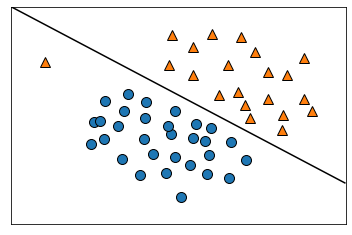

In [129]:
SVM(X,y,C=1.0)

C=100

accuracy=1.0
predict(X[0]):[1],y[0]=[1]


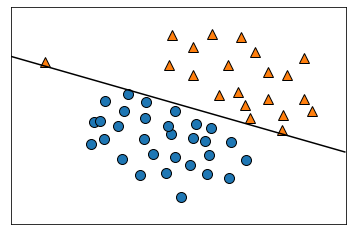

In [130]:
SVM(X,y,C=100)

C=10000

accuracy=1.0
predict(X[0]):[1],y[0]=[1]


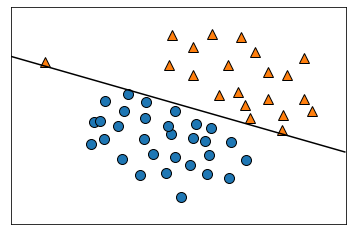

In [131]:
SVM(X,y,C=10000)

##non-linear SVM

In [132]:
X,y=load_data(data_path='ex4data2.mat')
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C=100,gamma=10

accuracy=0.9698725376593279
predict(X[0]):[1],y[0]=[1]


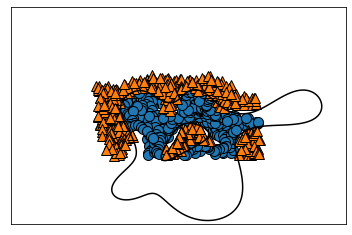

In [133]:
SVM(X,y,kernel='rbf', C=100,gamma=10)

C=10000,gamma=100

accuracy=1.0
predict(X[0]):[1],y[0]=[1]


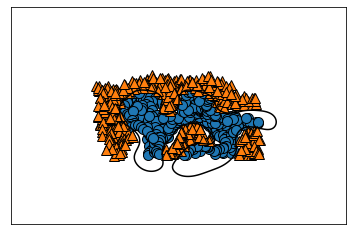

In [134]:
SVM(X,y,kernel='rbf', C=10000,gamma=100)

##task3

In [135]:
data = loadmat('ex4data3.mat')
X = data["X"]
y = data["y"].ravel()
Xval = data["Xval"]
yval = data["yval"].ravel()

accuracy=0.965


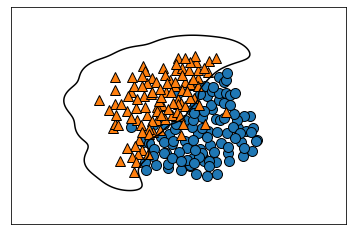

In [160]:
def grid_search(X,y,Xval,yval):
    max_accuracy=0
    max_gamma=0
    max_C=0
    C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30,90, 100]
    gamma_values = [0.01, 0.03, 0.1, 0.2,0.3,0.6,1, 3, 10, 30, 100]
    for C in C_values:
        for gamma in gamma_values:
            svc = svm.SVC(kernel='rbf', C=C, gamma=gamma)
            model=svc.fit(X,y)
            accuracy=model.score(Xval,yval)
            if accuracy>max_accuracy:
                max_accuracy=accuracy
                max_gamma=gamma
                max_C=C

    svc = svm.SVC(kernel='rbf', C=max_C, gamma=max_gamma)
    model=svc.fit(X,y)
    print(f'accuracy={max_accuracy}')
    mglearn.plots.plot_2d_separator(model, X, eps=.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

grid_search(X,y,Xval,yval)

##task 4

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.92
Правильность на обучающем наборе: 0.99
Правильность на тестовом наборе: 0.97


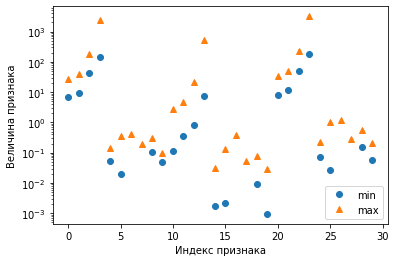

In [205]:
def plot_data(X_train):
    plt.plot(X_train.min(axis=0), 'o', label="min")
    plt.plot(X_train.max(axis=0), '^', label="max")
    plt.legend(loc=4)
    plt.xlabel("Индекс признака")
    plt.ylabel("Величина признака")
    plt.yscale("log")

def norm(data:pd.DataFrame):
    data=pd.DataFrame(data)
    for colum in list(data.columns):
      mean=data[colum].mean()
      std=data[colum].std()
      data[colum]=(data[colum]-mean)/std
    data=np.array(data)
    return data

def task4(X_train, X_test, y_train, y_test):
    svc = svm.SVC(C=100)

    svc.fit(X_train, y_train)
    print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
    print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))
    plot_data(X_train)

    X_train=norm(X_train)
    X_test=norm(X_test)

    svc = svm.SVC()
    svc.fit(X_train, y_train)
    print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
    print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))


import copy
task4(copy.deepcopy(X_train), copy.deepcopy(X_test), y_train, y_test)

after normalization, the forecasting accuracy increased significantly

##Spam

In [273]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nasta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [460]:
def processEmail(string):

    def lower_casing():
        return string.lower()

    def stripping_HTML():
        return  string.translate({ord(i): None for i in "'/<[^>]*>?/"})

    def normalizing_URLs():
        return re.sub(r"http?:www[^,\s]+,?", "httpaddr", string)

    def normalizing_email():
        return re.sub(r"[^,\s]+,?@[^,\s]+,?", "emailaddr", string)

    def normalizing_numbers():
        return string.translate({ord(i): 'number' for i in '1234567890'})

    def normalizing_dollars():
        return string.replace('$', 'dolar')

    def word_stemming():
        pStemmer = PorterStemmer()
        tokens = word_tokenize(string)
        string_new=''
        for words in tokens:
            string_new+=pStemmer.stem(words)+' '
        return string_new

    def application_marks(): #removal_non_words():
        return re.sub(r'[^\w\s]','', string) #string.translate({ord(i): 'number' for i in '.,'})

    def del_spaces():
        return string.replace('  ', ' ')



    string=lower_casing()
    string=stripping_HTML()
    #string=del_enter()
    string=normalizing_URLs()
    string=normalizing_email()
    string=normalizing_numbers()
    string=normalizing_dollars()
    string=word_stemming()
    string=application_marks()
    string=del_spaces()

    return string

def string_to_list(string):
    return string.split()

def words_to_number(words_list):
    return [indexs[words.index(word)] for word in words_list if word in words]

def getFeatures(vocabList,size):
    return [1 if item in vocabList else 0 for item in range(size)]

##test

In [461]:
with open('emailSample1.txt','r') as f:
  f=f.read()

test_text="anyon know how much it cost to host a web portal well it depend on how mani visitor your " \
  "expect this can be anywher from less than number buck a month to a coupl of dollar numb you" \
  "should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib" \
  "yourself from this mail list send an email to emailaddr "

norm_text=processEmail(f)
print(norm_text)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than numbernumb buck a month to a coupl of dolarnumbernumbernumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 


In [462]:
def transform(data:pd.DataFrame):
    data=np.resize(data,(1,len(data)))
    return list(data[0])

data = pd.read_table(r'vocab.txt',header=None,sep=r"\s+")
data.columns=['index','word']
indexs = transform(data[data.columns[:-1]])
words = transform(data[data.columns[-1:]])

size=len(indexs)
print(f'size={size}')

size=1899


In [463]:
tmp=[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592,
238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237,
810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 992, 961, 1477, 71, 530, 1699, 531]
#def string_to_list():

norm_text=processEmail(f)
list_words = string_to_list(norm_text)
vocabList=words_to_number(list_words)
print(vocabList)
print(f'len={len(vocabList)}')

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1062, 1699, 375, 1162, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
len=50


In [465]:
vector=getFeatures(vocabList,size)
print(f'number of one={vector.count(1)}')

number of one=42


##train

In [504]:
data_train = loadmat('spamTrain.mat')
data_test = loadmat('spamTest.mat')

X_train = data_train["X"]
y_train = data_train["y"].ravel()

X_test = data_test["Xtest"]
y_test  = data_test["ytest"].ravel()

In [520]:
def spam(X_train, X_test, y_train, y_test,C_linear=0.1,C_non_linear=1.5,gamma=0.01):

    linear_svc = svm.SVC(kernel='linear', C=C_linear)
    linear_svc.fit(X_train, y_train)
    print("____linear SVM____")
    print("Правильность на обучающем наборе: {:.4f}".format(linear_svc.score(X_train, y_train)))
    print("Правильность на тестовом наборе: {:.4f}".format(linear_svc.score(X_test, y_test)))

    non_linear_svc = svm.SVC(kernel='rbf', C=C_non_linear,gamma=gamma)

    non_linear_svc.fit(X_train, y_train)
    print("____non-linear SVM____")
    print("Правильность на обучающем наборе: {:.4f}".format(non_linear_svc.score(X_train, y_train)))
    print("Правильность на тестовом наборе: {:.4f}".format(non_linear_svc.score(X_test, y_test)))


#Получите точность около 99,8% на тренировочном и 98,9% на тестовом наборах данных
spam(copy.deepcopy(X_train), copy.deepcopy(X_test), y_train, y_test)

____linear SVM____
Правильность на обучающем наборе: 0.9982
Правильность на тестовом наборе: 0.9890
____non-linear SVM____
Правильность на обучающем наборе: 0.9945
Правильность на тестовом наборе: 0.9910
